<div class="usecase-title">Bird Habitat Analysis T1 2024</div>

<div class="usecase-authors"><b>Authored by: </b>Katrine Chan</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python </div>
</div>

<div class="usecase-section-header">Scenario</div>

As a member of the council, I am eager to explore bird habitats within Melbourne city.  Imagine a city without birds! Bird habitats are not only a source of beauty and wonder but also a sign of a healty ecosystem, reflecting the quality of air, water and vegetation of a city.  A thorough analysis of bird habitats will enable us to identify critical habitats and biodiverstiy hotspots within Melbourne, guiding conservation priorities and land management decisions.  This investigation aligns closely with the mission to prioritise the environment and biodiversity in the City of Melbourne. Through this analysis, I aim to discover:

* Identify the types of birds found in the City of Melbourne based on the bird survey completed in 2018.
* Provide relevant visualisations to offer insights from the bird survey.
* Analyse the tree canopies data provided by the City of Melbourne in 2018.
* Create appropriate visualisations to offer insights into the tree canopies found in the City of Melbourne.
* Integrate the above datasets, combining and presenting them visually.
* Develop a predictive model using machine learning techniques to forecast bird sightings.


At the end of this use case you will:
* Have gained an understanding of using APIs
* Have learned how to fetch datasets using APIs from Melbourne Open Data Database 
* Become familiar with performing data pre-processing
* Learned how to visualise real-life data using appropriate visualisation tools
* Learned how to work with various geospatial data processing and analysis tools  
* Learned how to work with more than one dataset
* Explored working with two machine learning models: Random Forest Regressor and Gradient Boosting
* Learn the usage of GridSearch

<div class="usecase-section-header"><i><b>Introduction</i></b></div>

To complete our bird habitat analysis, two datasets will be used.  These datasets will include below:

* Bird survey result for areas in the city of Melbourne in February and March 2018 - 
The bird survey contains data from multiple river and wetland sites in Melbourne. Surveys were conducted by Ecology Australia during February and March 2018, recording species richness and numbers. 
* Tree canopies public realm 2018 (Urban Forest) - 
Tree canopy within City of Melbourne mapped using 2018 aerial photos and LiDAR. The canopy polygons represent actual tree canopy extents on public property (land managed by the City of Melbourne) across the city. 

<p style="font-weight: bold; font-size: 1.2em;">Part 1 - Importing Modules</p>

In [1]:
# importing required modules required to complete this analysis

import requests
import pandas as pd
import numpy as np
from io import StringIO

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import folium
from folium.plugins import MousePosition

import geopandas as gpd
from shapely.geometry import Point
import json

from shapely.ops import nearest_points

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from ipywidgets import interact, widgets



<p style="font-weight: bold; font-size: 1.2em;">Part 2 - Retrieving Bird Survey Results from Melboure Open Data</p>



In [2]:
# Retrieving Bird Survey Data from Melbourne Open Data through the use of API

# https://data.melbourne.vic.gov.au/explore/dataset/bird-survey-results-for-areas-in-the-city-of-melbourne-february-and-march-2018/information/
dataset_id = 'bird-survey-results-for-areas-in-the-city-of-melbourne-february-and-march-2018'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    birds_df = pd.read_csv(StringIO(url_content), delimiter= ';')
    print(birds_df.sample(10, random_state = 999))
else: 
    print(f'Request failed with status code{response.status_code}')

    sighting_date         common_name              scientific_name  \
194    2018-03-12       House Sparrow            Passer domesticus   
490    2018-02-15     Welcome Swallow        Petrochelidon neoxena   
253    2018-03-12   Superb Fairy-wren              Malurus cyaneus   
279    2018-03-12       Dusky Moorhen          Gallinula tenebrosa   
94     2018-02-15       Chestnut Teal                Anas castanea   
151    2018-02-15  Australasian Grebe  Tachybaptus novaehollandiae   
233    2018-02-15   Little Wattlebird      Anthochaera chrysoptera   
124    2018-03-19    Rainbow Lorikeet     Trichoglossus haematodus   
457    2018-03-19      Red Wattlebird      Anthochaera carunculata   
211    2018-03-12           Rock Dove                Columba livia   

     sighting_count  victorian_biodiversity_atlas_code      lat       lon  \
194              18                              10995 -37.8038  144.9118   
490              14                              10357 -37.7792  144.9482  

In [3]:
# obtaining the shape of the birds survey data frame and printing out the number of rows and columns in the birds dataframe 
num_rows, num_cols = birds_df.shape

print("Number of rows in the birds_df is:", num_rows)
print("Number of columns in the birds_df is:", num_cols)

# printing out the first 10 observations in dataframe to understand the information the dataframe contains
birds_df.head(10)

Number of rows in the birds_df is: 498
Number of columns in the birds_df is: 14


,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc,lat2,lon2,loc2_desc,site_name,location_2,location_1
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
5,2018-03-06,Common Blackbird,Turdus merula,1,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
6,2018-03-19,Common Blackbird,Turdus merula,3,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
7,2018-02-15,Common Myna,Acridotheres tristis,36,10998,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
8,2018-02-15,Common Starling,Sturnus vulgaris,3,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
9,2018-03-19,Common Starling,Sturnus vulgaris,0,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"


<p style="font-weight: bold; font-size: 1.2em;">Part 3 - Pre-processing of birds_df</p>

In [4]:
# Looking at the birds_df, there are features which can be dropped, 
# these includes lat2 lon2 loc2_desc site_name location_2 location_1
# these contain the same information as other existing data and therefore 
# will be dropped

columns_to_drop = ['lat2', 'lon2', 'loc2_desc', 'site_name', 'location_2', 'location_1']
birds_df = birds_df.drop(columns=columns_to_drop)

birds_df


,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
...,...,...,...,...,...,...,...,...
493,2018-02-20,Pacific Black Duck,Anas superciliosa,4,10208,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...
494,2018-02-20,Magpie-lark,Grallina cyanoleuca,13,10415,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...
495,2018-02-20,Red Wattlebird,Anthochaera carunculata,10,10638,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...
496,2018-02-20,Australian Magpie,Gymnorhina tibicen,4,10705,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...


In [5]:
# Checking for missing values in the birds_df 

missing_values = birds_df.isna().sum()
print(missing_values)


sighting_date                        0
common_name                          0
scientific_name                      0
sighting_count                       0
victorian_biodiversity_atlas_code    0
lat                                  0
lon                                  0
loc1_desc                            0
dtype: int64


This shows that there are no missing values in the dataframe 

<p style="font-weight: bold; font-size: 1.2em;">Part 4 - Exploratory Data Analysis on birds_df</p>


In [6]:
# Finding the date range of the dataset
earliest_date = birds_df['sighting_date'].min()
latest_date = birds_df['sighting_date'].max()

# Displaying the date range
print("Date range for the birds_df:")
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)


Date range for the birds_df:
Earliest date: 2018-02-15
Latest date: 2018-03-19


This confirms that the observation period for the bird survey started on 15th Feb 2018 and finishes on 19th March 2018.

In [7]:
# Counting number of unique bird species
num_unique = birds_df['common_name'].nunique()

# Display the number of unique bird species 
print("Number of unique bird species sighted:", num_unique)

# Display the unique bird species 
unique_values = birds_df['common_name'].unique()
print("\nUnique Bird Species:")
print(unique_values)

# Calculating the total number of bird sightings 
total_sights = birds_df['sighting_count'].sum()
print("\nTotal number of bird sightings:", total_sights)


Number of unique bird species sighted: 50

Unique Bird Species:
['Australian Magpie' 'Australian White Ibis' 'Chestnut Teal'
 'Common Blackbird' 'Common Myna' 'Common Starling' 'Dusky Moorhen'
 'Eastern Great Egret' 'Little Pied Cormorant' 'Little Raven'
 'Little Wattlebird' 'Magpie-lark' 'Musk Lorikeet' 'Nankeen Night Heron'
 'New Holland Honeyeater' 'Pacific Black Duck' 'Rainbow Lorikeet'
 'Red Wattlebird' 'Rock Dove' 'Spotted Turtle-Dove' 'Superb Fairy-wren'
 'White-plumed Honeyeater' 'Willie Wagtail' 'Clamorous Reed Warbler'
 'House Sparrow' 'Noisy Miner' 'White-faced Heron' 'Black Swan'
 'Brown Thornbill' 'Darter' 'Eurasian Coot' 'Grey Teal'
 'Hoary-headed Grebe' 'Little Black Cormorant'
 'Phylidonyris novaehollandiae' 'Silver Gull' 'Welcome Swallow'
 'White-browed Scrubwren' 'Hardhead' 'Australasian Grebe' 'Bell Miner'
 'Tree Martin' 'Crested Tern' 'European Greenfinch' 'Australian Wood Duck'
 'Masked Lapwing' 'Red-rumped Parrot' 'Great Cormorant'
 'Spotted Pardalote' 'Crested Pi

During the survey period, 50 unique bird species were observed, with a total sightings of 6712 birds. 

In [8]:
# calculating the sum of sight_count of each unique bird species
sight_count_totals = birds_df.groupby('common_name')['sighting_count'].sum()

# Displaying the total of each bird species
print("Total sight count for each type of bird species from 15-02-2018 to 19-03-2018:")
print(sight_count_totals)


Total sight count for each type of bird species from 15-02-2018 to 19-03-2018:
common_name
Australasian Grebe                10
Australian Magpie                 20
Australian White Ibis            471
Australian Wood Duck               1
Bell Miner                         8
Black Swan                         6
Brown Thornbill                    6
Chestnut Teal                    364
Clamorous Reed Warbler            11
Common Blackbird                  46
Common Myna                      539
Common Starling                  141
Crested Pigeon                    58
Crested Tern                       1
Darter                             2
Dusky Moorhen                     21
Eastern Great Egret                4
Eurasian Coot                      9
European Greenfinch                1
Great Cormorant                   22
Grey Teal                         69
Hardhead                           7
Hoary-headed Grebe                 1
House Sparrow                    420
Little Black Cormoran

In [9]:
# sort sight count from largest to smallest
sorted_sight_count_totals = sight_count_totals.sort_values(ascending=False)

# Printing the sorted list
print("Total sight count for each bird (sorted by largest to smallest):")
print(sorted_sight_count_totals)


Total sight count for each bird (sorted by largest to smallest):
common_name
Silver Gull                     1311
Rock Dove                       1308
Common Myna                      539
Australian White Ibis            471
House Sparrow                    420
White-plumed Honeyeater          370
Chestnut Teal                    364
Spotted Turtle-Dove              317
Little Raven                     165
Common Starling                  141
Little Wattlebird                118
Red Wattlebird                   104
Superb Fairy-wren                101
Pacific Black Duck                92
Magpie-lark                       90
Rainbow Lorikeet                  88
Little Pied Cormorant             77
Grey Teal                         69
New Holland Honeyeater            67
Little Black Cormorant            65
Crested Pigeon                    58
Willie Wagtail                    48
Common Blackbird                  46
Musk Lorikeet                     38
Noisy Miner                       3

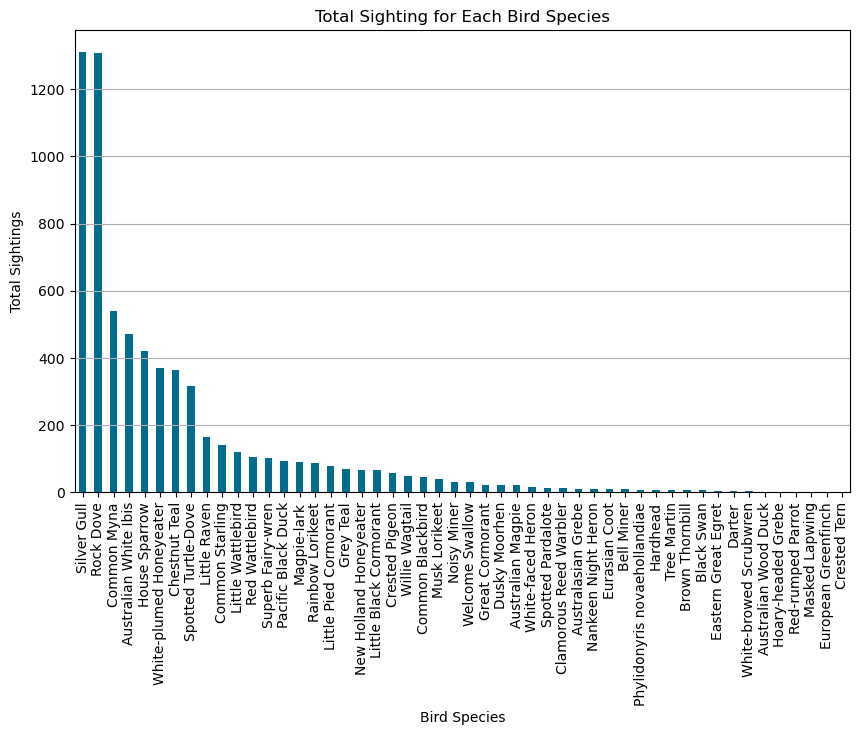

In [10]:

# Plotting the sightings for each bird species from largest to smallest
plt.figure(figsize=(10, 6))
sorted_sight_count_totals.plot(kind='bar', color='#056b8a')
plt.title('Total Sighting for Each Bird Species')
plt.xlabel('Bird Species')
plt.ylabel('Total Sightings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for y-axis
plt.show()


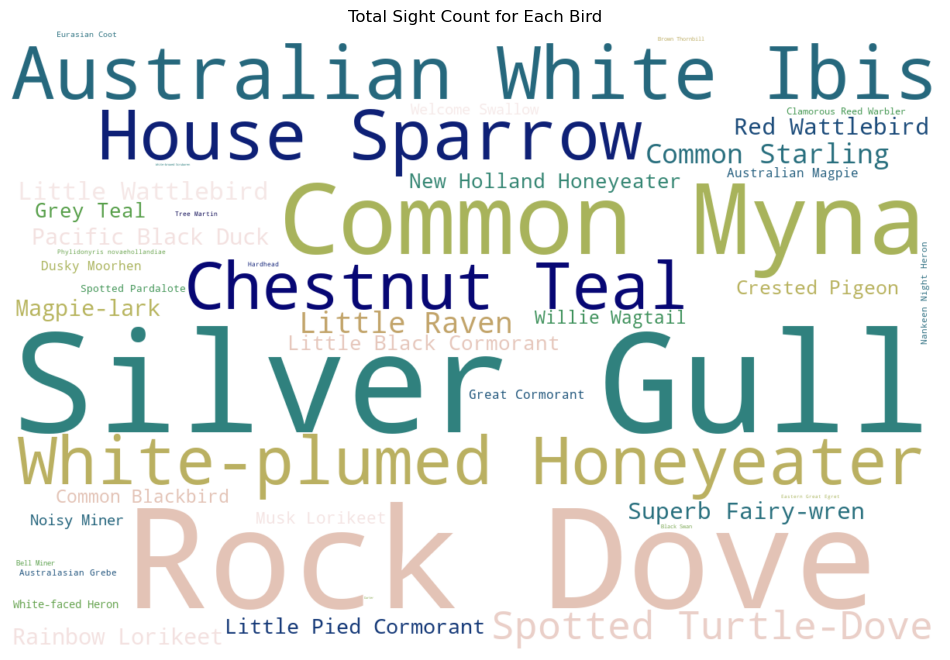

In [11]:
# WordCloud chart - an alternative way to display the most sighted bird species through the survey period

# creating a dict to have bird species as keys and counts as values
sight_count_dict = sorted_sight_count_totals.to_dict()

# creating wordcloud instance
wordcloud = WordCloud(width=1200, 
                      height=800, 
                      background_color='white',
                      colormap = 'gist_earth')

# generates word cloud from frequences in the dict
wordcloud.generate_from_frequencies(sight_count_dict)


plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Sight Count for Each Bird')
plt.show()


The most frequently observed bird species during the survey period were the Silver Gull and Rock Dove, with 1311 and 1308 sightings, respectively. The least observed species, each with only a single sighting throughout the entire survey period, were the Australian Wood Duck, Hoary-headed Grebe, Red-rumped Parrot, Masked Lapwing, European Greenfinch, and Crested Tern.

In [12]:
# finding the unique latitude and longtitude pairs indicating the locations of these sightings
unique_lat_lon = birds_df[['lat', 'lon']].drop_duplicates()
unique_lat_lon

,lat,lon
0,-37.8038,144.9118
45,-37.8028,144.9249
88,-37.8054,144.9364
142,-37.8008,144.9099
151,-37.7792,144.9482
162,-37.8138,144.8727


6 unique locations were identified.  

In [13]:

# Create a map centered at a specific location
my_map = folium.Map(location=[-37.81141, 144.9258], zoom_start=13)  # Somewhere in West Melb to centred the map around birds sightings

# Group by latitude and longitude, and sum up the sighting counts
grouped_data = birds_df.groupby(['lat', 'lon'])['sighting_count'].sum().reset_index()

# Creating markers - to show the total bird counts in the specific location  
for index, row in grouped_data.iterrows():
    total_bird_counts = row['sighting_count']
    tooltip_text = f'Total Bird Count: {total_bird_counts}'
    folium.Marker([row['lat'], row['lon']], tooltip=tooltip_text).add_to(my_map)

# MousePosition to show coordinate when mouse hover over the map
#MousePosition().add_to(my_map)

# Display map
my_map

<p style="font-weight: bold; font-size: 1.2em;">Part 5 - Retrieving Tree Canopies 2018 Data from Melboure Open Data</p>

In [14]:
# https://data.melbourne.vic.gov.au/explore/dataset/tree-canopies-public-realm-2018-urban-forest/information/
dataset_id = 'tree-canopies-public-realm-2018-urban-forest'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    canopies_df = pd.read_csv(StringIO(url_content), delimiter= ';')
    print(canopies_df.sample(10, random_state = 999))
else: 
    print(f'Request failed with status code{response.status_code}')

                                  geo_point_2d  \
4993   -37.789245487248955, 144.94907327748658   
31513   -37.78846374389525, 144.95420928619802   
18171    -37.80692169787488, 144.9118117646351   
7396    -37.83596676660426, 144.98204783875804   
31227    -37.78449294222701, 144.9578644584792   
20428   -37.82450732516304, 144.97277931148116   
4737    -37.79066825673181, 144.96852564886908   
4481     -37.79166297370613, 144.9467889348235   
29950  -37.786052378475034, 144.94211772681197   
20014  -37.827161332727364, 144.95396048362198   

                                               geo_shape  objectid  \
4993   {"coordinates": [[[[144.94902392357957, -37.78...     26783   
31513  {"coordinates": [[[[144.95420648034033, -37.78...     27535   
18171  {"coordinates": [[[[144.91183016948642, -37.80...     13420   
7396   {"coordinates": [[[[144.98205287385025, -37.83...      1304   
31227  {"coordinates": [[[[144.95787040149435, -37.78...     29225   
20428  {"coordinates": [[[[14

In [15]:
# obtaining the shape of the canopies 2018 data frame and printing out the number of rows and columns in the canopies dataframe 
num_rows, num_cols = canopies_df.shape

print("Number of rows in the canopies_df is:", num_rows)
print("Number of columns in the canopies_df is:", num_cols)

# printing out the first 10 observations in dataframe to understand the information the dataframe contains
canopies_df.head(10)

Number of rows in the canopies_df is: 32787
Number of columns in the canopies_df is: 5


,geo_point_2d,geo_shape,objectid,shape_leng,shape_area
0,"-37.78645081161359, 144.9457948486621","{""coordinates"": [[[[144.9458032369502, -37.786...",28424,9.758772,7.146249
1,"-37.78665289265347, 144.95688839987147","{""coordinates"": [[[[144.95688796441414, -37.78...",28427,25.145322,39.658550
2,"-37.78634183331809, 144.9437100316845","{""coordinates"": [[[[144.94371952530884, -37.78...",28447,6.545899,2.960294
3,"-37.78645783366489, 144.94630436225728","{""coordinates"": [[[[144.9463102465029, -37.786...",28436,19.817709,21.555092
4,"-37.78660663588553, 144.9527556191466","{""coordinates"": [[[[144.95283728640467, -37.78...",28440,81.959875,284.081588
5,"-37.786335429910025, 144.9418244644021","{""coordinates"": [[[[144.94183055252876, -37.78...",28441,3.709592,0.999001
6,"-37.78639375723135, 144.94607838964833","{""coordinates"": [[[[144.94608601536297, -37.78...",28445,5.382447,2.131346
7,"-37.786543214365906, 144.95654083974642","{""coordinates"": [[[[144.95654581041998, -37.78...",28453,2.606254,0.460448
8,"-37.786254327925114, 144.94180926853593","{""coordinates"": [[[[144.9418154254935, -37.786...",28466,3.592320,0.903463
9,"-37.786693200794694, 144.9631233333797","{""coordinates"": [[[[144.96315334980625, -37.78...",28454,30.663307,52.855833


Based on the data, there were a total of 32,787 tree canopies across the city of Melbourne in the year of 2018. 

<p style="font-weight: bold; font-size: 1.2em;">Part 6 - Pre-processing and EDA Tree Canopies 2018 Data from Melboure Open Data</p>

In [16]:
# Checking for missing values in canopies_df
missing_values = canopies_df.isna().sum()
print(missing_values)

geo_point_2d    0
geo_shape       2
objectid        0
shape_leng      0
shape_area      0
dtype: int64


There are two missing values under geo_shape, further exploration is required to determine the appropriate course of action. 

In [17]:
# print out the rows with missing observations under geo_shape column
print(canopies_df[canopies_df['geo_shape'].isna()])

                                  geo_point_2d geo_shape  objectid  \
5222   -37.792210395218454, 144.93217446167108       NaN     24393   
19645   -37.83559414630663, 144.98132315453557       NaN      1382   

       shape_leng  shape_area  
5222     1.556349    0.011321  
19645    1.382046    0.020725  


Since there are only two observsations out of the 32,787 total, and it is not feasible to replace the missing values with the median or mean of other geo_shape, it has been determined that these two observations will be dropped from the dataset. 

In [18]:
# dropping the two observations with missing values under geo_shape
canopies_df = canopies_df.dropna()

# Checking again for missing values
missing_values = canopies_df.isna().sum()
print(missing_values)


geo_point_2d    0
geo_shape       0
objectid        0
shape_leng      0
shape_area      0
dtype: int64


The canopies_df now contains no missing values. 

In [19]:
# Below codes can be used to plot the 32,785 canopies geo_shape on a map, 
# however, due to the large size (160MB) this plot will not be plotted. 
# To plot the map, remove ''' at the start and the end of the code  

'''
# Plotting geo-shapes

# Create a map centered at a specific location
my_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)  # Melbourne

# defining style of map
def style_function(feature):
    return {
        'fillColor': 'blue',
        'color': None,
        'fillOpacity': 0.5
    }

# going through each row to retrieves each geo_shape and assign it to geo_shape_value
for index, row in canopies_df.iterrows():
    geo_shape_value = row['geo_shape']
    
    # using geo_shape_value create each geoshape
    folium.GeoJson(geo_shape_value, style_function= style_function).add_to(my_map)

my_map
'''


"\n# Plotting geo-shapes\n\n# Create a map centered at a specific location\nmy_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)  # Melbourne\n\n# defining style of map\ndef style_function(feature):\n    return {\n        'fillColor': 'blue',\n        'color': None,\n        'fillOpacity': 0.5\n    }\n\n# going through each row to retrieves each geo_shape and assign it to geo_shape_value\nfor index, row in canopies_df.iterrows():\n    geo_shape_value = row['geo_shape']\n    \n    # using geo_shape_value create each geoshape\n    folium.GeoJson(geo_shape_value, style_function= style_function).add_to(my_map)\n\nmy_map\n"

<p style="font-weight: bold; font-size: 1.2em;">Part 7 - Merging the birds_df and canopies_df</p>


In [20]:
# Create a geometry column in birds_df using the lon and lat as Point geometries to enable the merge with canopies_df
birds_df['geometry'] = birds_df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# creating a geodataframe with the EPSG:4326 coordinate reference system 
birds_gdf = gpd.GeoDataFrame(birds_df, geometry='geometry', crs='EPSG:4326') # coordinate reference system 

birds_gdf


,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc,geometry
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380)
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380)
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380)
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380)
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380)
...,...,...,...,...,...,...,...,...,...
493,2018-02-20,Pacific Black Duck,Anas superciliosa,4,10208,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380)
494,2018-02-20,Magpie-lark,Grallina cyanoleuca,13,10415,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380)
495,2018-02-20,Red Wattlebird,Anthochaera carunculata,10,10638,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380)
496,2018-02-20,Australian Magpie,Gymnorhina tibicen,4,10705,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380)


In [21]:
# Preparing the canopies_df for the merge 

# As the geo_shape is provided in a GeoJaSON form, a function is required 
# to convert GeoJSON strings to GeoPandas geometries
def parse_geojson(geojson_string):
    geo_df = gpd.read_file(geojson_string) #taking the geostring as input and read using gpd
    geometry = geo_df.geometry #then extracting the geometry using .geometry
    return geometry

# applying above function to the geo_shape column with the geojson
canopies_df.loc[:, 'geometry'] = canopies_df['geo_shape'].apply(parse_geojson)

# new gdf ready for merge 
canopies_gdf = gpd.GeoDataFrame(canopies_df.copy(), geometry='geometry')

canopies_gdf



,geo_point_2d,geo_shape,objectid,shape_leng,shape_area,geometry
0,"-37.78645081161359, 144.9457948486621","{""coordinates"": [[[[144.9458032369502, -37.786...",28424,9.758772,7.146249,"MULTIPOLYGON (((144.94580 -37.78644, 144.94581..."
1,"-37.78665289265347, 144.95688839987147","{""coordinates"": [[[[144.95688796441414, -37.78...",28427,25.145322,39.658550,"MULTIPOLYGON (((144.95689 -37.78662, 144.95689..."
2,"-37.78634183331809, 144.9437100316845","{""coordinates"": [[[[144.94371952530884, -37.78...",28447,6.545899,2.960294,"MULTIPOLYGON (((144.94372 -37.78634, 144.94372..."
3,"-37.78645783366489, 144.94630436225728","{""coordinates"": [[[[144.9463102465029, -37.786...",28436,19.817709,21.555092,"MULTIPOLYGON (((144.94631 -37.78643, 144.94631..."
4,"-37.78660663588553, 144.9527556191466","{""coordinates"": [[[[144.95283728640467, -37.78...",28440,81.959875,284.081588,"MULTIPOLYGON (((144.95284 -37.78654, 144.95284..."
...,...,...,...,...,...,...
32782,"-37.78852115980117, 144.92333931648147","{""coordinates"": [[[[144.92333538171314, -37.78...",26881,4.160520,1.348466,"MULTIPOLYGON (((144.92334 -37.78853, 144.92333..."
32783,"-37.78929070901521, 144.95745545160335","{""coordinates"": [[[[144.95736874757412, -37.78...",26882,139.892778,510.827677,"MULTIPOLYGON (((144.95737 -37.78911, 144.95737..."
32784,"-37.78886861465895, 144.94305873505778","{""coordinates"": [[[[144.94306096662646, -37.78...",26884,8.119396,5.232788,"MULTIPOLYGON (((144.94306 -37.78888, 144.94306..."
32785,"-37.78899424455072, 144.94820633130126","{""coordinates"": [[[[144.94824564679345, -37.78...",26885,33.770666,28.128738,"MULTIPOLYGON (((144.94825 -37.78897, 144.94824..."


Both the birds_df and canopies_df have now been converted to GeoDataFrames ready for merging using relevant spatial information. 

In [22]:
# Error message without these so below were added. 
birds_gdf.crs = 'EPSG:4326'
canopies_gdf.crs = 'EPSG:4326'


# Perform spatial join using the birds_gdf and canopies_gdf created above
# left is used retaining all results from birds_gdf
# parameter op within checks if points in birds_gdf are within multipolygons in canopies gdf
joined_df = gpd.sjoin(birds_gdf, canopies_gdf, how='left', predicate='within')

# Add column to indicate if a point is within a canopy
joined_df['within_canopy'] = ~joined_df['index_right'].isnull()

joined_df



,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc,geometry,index_right,geo_point_2d,geo_shape,objectid,shape_leng,shape_area,within_canopy
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),12796.0,"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",14896.0,197.010186,564.959986,True
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),12796.0,"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",14896.0,197.010186,564.959986,True
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),12796.0,"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",14896.0,197.010186,564.959986,True
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),12796.0,"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",14896.0,197.010186,564.959986,True
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),12796.0,"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",14896.0,197.010186,564.959986,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2018-02-20,Pacific Black Duck,Anas superciliosa,4,10208,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,NaN,NaN,NaN,NaN,False
494,2018-02-20,Magpie-lark,Grallina cyanoleuca,13,10415,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,NaN,NaN,NaN,NaN,False
495,2018-02-20,Red Wattlebird,Anthochaera carunculata,10,10638,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,NaN,NaN,NaN,NaN,False
496,2018-02-20,Australian Magpie,Gymnorhina tibicen,4,10705,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,NaN,NaN,NaN,NaN,False


Both the birds_df and canopies_df have now been merged into a single dataframe named joined_df for further analysis. 

<p style="font-weight: bold; font-size: 1.2em;">Part 8 - Exploring and Cleansing the new joined Dataframe joined_df</p>


In [23]:
# obtaining the shape of the joined_df survey data frame and printing out the number of rows and columns 
num_rows, num_cols = joined_df.shape

print("Number of rows in the joined_df is:", num_rows)
print("Number of columns in the joined_df is:", num_cols)

# printing out the first 10 observations in dataframe to understand the information the dataframe contains
birds_df.head(10)

Number of rows in the joined_df is: 498
Number of columns in the joined_df is: 16


,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc,geometry
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
5,2018-03-06,Common Blackbird,Turdus merula,1,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
6,2018-03-19,Common Blackbird,Turdus merula,3,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
7,2018-02-15,Common Myna,Acridotheres tristis,36,10998,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
8,2018-02-15,Common Starling,Sturnus vulgaris,3,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)
9,2018-03-19,Common Starling,Sturnus vulgaris,0,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.9118 -37.8038)


In [24]:
# printing out features(column) in the joined_df
print(joined_df.columns.tolist())

['sighting_date', 'common_name', 'scientific_name', 'sighting_count', 'victorian_biodiversity_atlas_code', 'lat', 'lon', 'loc1_desc', 'geometry', 'index_right', 'geo_point_2d', 'geo_shape', 'objectid', 'shape_leng', 'shape_area', 'within_canopy']


In [25]:
# There are columns which hold duplicated information and therefore these will be dropped
columns_to_drop = ['victorian_biodiversity_atlas_code', 
                   'index_right', 
                   'objectid',
                   'scientific_name']
joined_df = joined_df.drop(columns=columns_to_drop)

# Replace NaN values in 'shape_leng' and 'shape_are' columns with 0, where 'geo_points' do not fall into a geo_shape
joined_df['shape_leng'].fillna(0, inplace=True)
joined_df['shape_area'].fillna(0, inplace=True)

joined_df


,sighting_date,common_name,sighting_count,lat,lon,loc1_desc,geometry,geo_point_2d,geo_shape,shape_leng,shape_area,within_canopy
0,2018-03-12,Australian Magpie,2,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
1,2018-02-28,Australian White Ibis,141,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
2,2018-03-12,Australian White Ibis,83,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
3,2018-02-28,Chestnut Teal,7,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
4,2018-03-12,Chestnut Teal,5,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
...,...,...,...,...,...,...,...,...,...,...,...,...
493,2018-02-20,Pacific Black Duck,4,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False
494,2018-02-20,Magpie-lark,13,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False
495,2018-02-20,Red Wattlebird,10,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False
496,2018-02-20,Australian Magpie,4,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False


In [26]:
df_map = joined_df

In [27]:
# Creating a map showing bird sighting points and the relevant geoshapes which they fall into

# Create a map centered at a specific location
my_map = folium.Map(location=[-37.81141, 144.9258], zoom_start=13)  # Somewhere in West Melb to centred the map around birds sightings

# Group by latitude and longitude, and sum up the sighting counts
grouped_data = birds_df.groupby(['lat', 'lon'])['sighting_count'].sum().reset_index()

# Creating markers - to show the total bird counts in the specific location  
for index, row in grouped_data.iterrows():
    total_bird_counts = row['sighting_count']
    tooltip_text = f'Total Bird Count: {total_bird_counts}'
    folium.Marker([row['lat'], row['lon']], tooltip=tooltip_text).add_to(my_map)
    
# Getting the unique geo_shape values from the joined_df and also dropping any NaN values
unique_geo_shapes = joined_df['geo_shape'].dropna().unique()

# Printing out the unique geo_shapes and adding to map
for geo_shape in unique_geo_shapes:
    geo_json = folium.GeoJson(geo_shape)
    geo_json.add_to(my_map)

my_map

This map illustrates that out of the six sighting locations, only two are situated within a tree canopy area. 

In [28]:
## Creating a map centered at a specific location
my_map = folium.Map(location=[-37.81141, 144.9258], zoom_start=13)  # Somewhere in West Melb to center the map around bird sightings

# Function to add markers to the map - to show the total bird counts in the specific location  
def add_markers(data):
    for index, row in data.iterrows():
        total_bird_counts = row['sighting_count']
        if 'common_name' in data.columns:
            tooltip_text = f'{row["common_name"]} Count: {total_bird_counts}'
        else:
            tooltip_text = f'Total Count: {total_bird_counts}'
        folium.Marker([row['lat'], row['lon']], tooltip=tooltip_text).add_to(my_map)

# Function to add geojson to the map
def add_geojson(data):
    # Getting the unique geo_shape values from the joined_df and also dropping any NaN values
    unique_geo_shapes = data['geo_shape'].dropna().unique()
    # Printing out the unique geo_shapes and adding to map
    for geo_shape in unique_geo_shapes:
        geo_json = folium.GeoJson(geo_shape)
        geo_json.add_to(my_map)
        
def update_map(location, common_name):
    global my_map  # Declare my_map as global
    
    # Clear existing map
    my_map = folium.Map(location=[-37.81141, 144.9258], zoom_start=13)  # Reset the map
    
    # Group by latitude and longitude, and sum up the sighting counts
    grouped_data = df_map.groupby(['lat', 'lon'])['sighting_count'].sum().reset_index()
    
    if location == 'All Locations' and common_name == 'All Bird Species':
        # Show all bird sightings
        add_markers(grouped_data)
        add_geojson(df_map)
    elif location == 'All Locations':
        # Show all bird sightings for a specific bird species
        filtered_data = df_map[df_map['common_name'] == common_name]
        add_markers(filtered_data.groupby(['lat', 'lon'])['sighting_count'].sum().reset_index())
        add_geojson(filtered_data)
    elif common_name == 'All Bird Species':
        # Show all bird sightings in a specific location
        filtered_data = df_map[df_map['loc1_desc'] == location]
        add_markers(filtered_data.groupby(['lat', 'lon'])['sighting_count'].sum().reset_index())
        add_geojson(filtered_data)
    else:
        # Filter data based on selected location and common name
        filtered_data = df_map[(df_map['loc1_desc'] == location) & (df_map['common_name'] == common_name)]

        # Check if any sightings are found for the selected location and common name
        if filtered_data.empty:
            no_sightings_message = f"No sightings of {common_name} found in {location}."
            default_location = [-37.81141, 144.9258]
            folium.Marker(default_location, tooltip=no_sightings_message, icon=folium.Icon(color='red')).add_to(my_map)
        else:
            # Group by latitude, longitude, and common name, and sum up the sighting counts
            grouped_data = filtered_data.groupby(['lat', 'lon', 'common_name'])['sighting_count'].sum().reset_index()
            # Creating markers to show the total bird counts of each common name in the specific location  
            add_markers(grouped_data)
        
        add_geojson(filtered_data)
    
    display(my_map)

# Sorting the location and bird names
sorted_loc_names = sorted(df_map['loc1_desc'].unique())
sorted_common_names = sorted(df_map['common_name'].unique())

# Create dropdown widgets for locations and common names
locations_dropdown = widgets.Dropdown(options=['All Locations'] + sorted_loc_names, description='Location:', disabled=False, layout={'width': '60%'})
common_names_dropdown = widgets.Dropdown(options=['All Bird Species'] + sorted_common_names, description='Bird Species:', disabled=False, layout={'width': '60%'})

# Englarging the description size to fit in title of dropdowns
locations_dropdown.style.description_width = '80px'
common_names_dropdown.style.description_width = '80px'

# Display the filtering and map
widgets.interactive(update_map, location=locations_dropdown, common_name=common_names_dropdown)


interactive(children=(Dropdown(description='Location:', layout=Layout(width='60%'), options=('All Locations', …

Above interactive map displays bird sightings across Melbourne, enabling users to explore specific locations and bird species. 

<p style="font-weight: bold; font-size: 1.2em;">Part 9 - Bird sightings prediction</p>

This section aims to predict the number of sightings of a specific bird species selected by the user. Additional information required from the user includes:
- The type of bird species.
- Whether the area is under a canopy.
- If a canopy exists, the perimeter length and area of the canopy.

In [29]:
# copy of joined_df is made so not to impact the uppercase and lower case of original dataframe
pred_df = joined_df.copy()

#Printing out the entire data frame for more understanding
pred_df.info()

# Convert 'common_name' column to lowercase
pred_df['common_name'] = pred_df['common_name'].str.lower()

pred_df

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 498 entries, 0 to 497
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sighting_date   498 non-null    object  
 1   common_name     498 non-null    object  
 2   sighting_count  498 non-null    int64   
 3   lat             498 non-null    float64 
 4   lon             498 non-null    float64 
 5   loc1_desc       498 non-null    object  
 6   geometry        498 non-null    geometry
 7   geo_point_2d    165 non-null    object  
 8   geo_shape       165 non-null    object  
 9   shape_leng      498 non-null    float64 
 10  shape_area      498 non-null    float64 
 11  within_canopy   498 non-null    bool    
dtypes: bool(1), float64(4), geometry(1), int64(1), object(5)
memory usage: 47.2+ KB


,sighting_date,common_name,sighting_count,lat,lon,loc1_desc,geometry,geo_point_2d,geo_shape,shape_leng,shape_area,within_canopy
0,2018-03-12,australian magpie,2,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
1,2018-02-28,australian white ibis,141,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
2,2018-03-12,australian white ibis,83,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
3,2018-02-28,chestnut teal,7,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
4,2018-03-12,chestnut teal,5,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,POINT (144.91180 -37.80380),"-37.80376975866237, 144.91199777799773","{""coordinates"": [[[[144.9121005094701, -37.803...",197.010186,564.959986,True
...,...,...,...,...,...,...,...,...,...,...,...,...
493,2018-02-20,pacific black duck,4,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False
494,2018-02-20,magpie-lark,13,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False
495,2018-02-20,red wattlebird,10,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False
496,2018-02-20,australian magpie,4,-37.8138,144.8727,Stony Creek at Upstream limit near Julian Stre...,POINT (144.87270 -37.81380),NaN,NaN,0.000000,0.000000,False


In [30]:
# Counting occurrences of unique values in pred_df
species_counts = pred_df['common_name'].value_counts()
sorted_species_counts = species_counts.sort_values(ascending=False)
print(sorted_species_counts)

common_name
superb fairy-wren               18
red wattlebird                  18
white-plumed honeyeater         18
common blackbird                18
common myna                     18
common starling                 18
willie wagtail                  18
chestnut teal                   18
magpie-lark                     18
house sparrow                   18
spotted turtle-dove             18
pacific black duck              18
rainbow lorikeet                18
little pied cormorant           17
rock dove                       17
little wattlebird               17
white-faced heron               17
clamorous reed warbler          17
australian magpie               16
little raven                    16
dusky moorhen                   15
silver gull                     12
eastern great egret             12
musk lorikeet                   12
welcome swallow                  8
new holland honeyeater           8
little black cormorant           6
grey teal                        6
noisy mi

Among the bird species recorded, 24 have been sighted more than 10 times, while 26 species have been sighted fewer than 10 times.

In [31]:
# Removing columns not reuqired for prediction 

pred_df = pred_df.drop(columns=['sighting_date',
                      'lat',
                      'lon',
                      'geometry',
                      'geo_point_2d', 
                      'loc1_desc',
                      'geo_shape'])

pred_df

,common_name,sighting_count,shape_leng,shape_area,within_canopy
0,australian magpie,2,197.010186,564.959986,True
1,australian white ibis,141,197.010186,564.959986,True
2,australian white ibis,83,197.010186,564.959986,True
3,chestnut teal,7,197.010186,564.959986,True
4,chestnut teal,5,197.010186,564.959986,True
...,...,...,...,...,...
493,pacific black duck,4,0.000000,0.000000,False
494,magpie-lark,13,0.000000,0.000000,False
495,red wattlebird,10,0.000000,0.000000,False
496,australian magpie,4,0.000000,0.000000,False


In [32]:
# finding the unique latitude and longtitude pairs indicating the locations of these sightings
unique_leng_area = pred_df[['shape_leng', 'shape_area']].drop_duplicates()

unique_leng_area_with_count = pred_df.groupby(['shape_leng', 'shape_area']).size().reset_index(name='count')
unique_leng_area_with_count

,shape_leng,shape_area,count
0,0.000000,0.000000,333
1,52.553307,120.879529,30
2,197.010186,564.959986,135


Above reveals that among the 498 rows, 333 exhibits zero values for both shape_leng and shape_area. Additionally, the dataset contains only 2 unique locations, indicating that these sightings were under a tree canopy. 

<b> Model Selection </b><br>
Random Forest was selected because:

- RF creates decision trees by bootstrapping data, making it well-suited for smaller datasets.
- RF builds decision trees and combines them together, resulting in more accurate and stable predictions.
- By averaging the results from multiple decision trees, random forest reduces overfitting compared to individual decision trees.
- RF is not sensitive to feature scaling or normalisation.

Gradient Boosting was selected because:
- GB builds trees sequentially, allowing errors to be corrected by the next tree, leading to better performance. However, GB can be prone to overfitting on small datasets.
- Feature scaling is not required.
- Optimisation of loss functions makes it flexible for various types of problems.
- It tends to offer higher predictive accuracy compared to other algorithms when tuned properly, hence the use of GridSearch for parameter optimisation.

In [96]:
## Requesting for User input (converting input to lowercase and striping out any spaces in front or end of user input
user_input = input("Please enter the bird species which you would like to make a sighting prediction for: ").lower().strip()

# Filtering the pred_df based on user input to the particular species of bird only
filtered_pred_df = pred_df[pred_df['common_name'].str.lower() == user_input]

# Check if 10 or more occurrences exist for the specified bird species to ensure a prediction can be done
num_occurrences = len(filtered_pred_df)  
if num_occurrences >= 10:
    # Ask user if there is a canopy in the area which prediction is for
    while True:
        user_within_canopy_input = input("Is the area under a tree canopy? (True/False): ").strip().lower()
        if user_within_canopy_input in ['true', 'false']:  #checking that input is either true or false
            user_within_canopy = user_within_canopy_input == 'true'
            break
        else:
            print("Please enter 'True' or 'False': ")  # keep prompting if not true or false 

    user_shape_leng = 0
    user_shape_area = 0

    # Ask user for canopy size if within canopy is True 
    if user_within_canopy:
        while True:  # size is requested if within_canopy is true stripping space start and end
            user_shape_leng_input = input("Enter the estimated length of canopy (in meters): ").strip()
            user_shape_area_input = input("Enter the estimated area of canopy (in square meters): ").strip()
            try:
                user_shape_leng = float(user_shape_leng_input)
                user_shape_area = float(user_shape_area_input)
                if user_shape_leng >= 0 and user_shape_area >= 0:  # Check inputs are >= 0
                    break  
                else:
                    print("Please enter positive numerical values for shape length and shape area of the canopy.")
            except ValueError:
                print("Please enter valid numerical values for shape length and shape area of the canopy.")

    # New df with user_input
    user_input_pred_df = pd.DataFrame({'shape_leng': [user_shape_leng],
                                         'shape_area': [user_shape_area],
                                         'within_canopy': [user_within_canopy]})


else:
    print("The bird species '{}' is not a valid species or does not have enough sightings ({} occurrences) to make an informed prediction.".format(user_input.upper(), num_occurrences))


Please enter the bird species which you would like to make a sighting prediction for:  red wattlebird
Is the area under a tree canopy? (True/False):  true
Enter the estimated length of canopy (in meters):  200
Enter the estimated area of canopy (in square meters):  100


In [97]:
# Random Forest Regressor with GridSearch

# Declaring X and Y variables 
X = filtered_pred_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_pred_df['sighting_count']

# Define parameter for grid search
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200], 
    'max_depth': [None, 2, 4, 6], 
    'min_samples_split': [2, 3, 5, 7], 
    'min_samples_leaf': [1, 2, 3, 4] 
}

# Initialising RandomForestRegressor
rf = RandomForestRegressor(random_state=3)

# Grid search
grid_search = GridSearchCV(rf, param_grid=param_grid)
grid_search.fit(X, y)

# Best parameters for grid search
best_rf = grid_search.best_estimator_

# Using best parameters for prediction 
predicted_sighting_count = best_rf.predict(user_input_pred_df)

# Printing predicted sighting count 
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    

# Calculate MSE, R-squared, MAE, and RMSE
mse_rf = mean_squared_error(y, best_rf.predict(X))
rmse_rf = mean_squared_error(y, best_rf.predict(X), squared=False)
mae_rf = mean_absolute_error(y, best_rf.predict(X))
r2_rf = r2_score(y, best_rf.predict(X))

print("\nRandom Forest MSE with GridSearch:", mse_rf)
print("Random Forest RMSE with GridSearch:", rmse_rf)
print("Random Forest MAE with GridSearch:", mae_rf)
print("Random Forest R2 with GridSearch:", r2_rf)

# Printing best grid search parameters
print("\nBest Parameters for Random Forest Regressor:", grid_search.best_params_)



Predicted Sighting Count of 'RED WATTLEBIRD': [4.87005372]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Random Forest MSE with GridSearch: 25.772276066826834
Random Forest RMSE with GridSearch: 5.076640234133873
Random Forest MAE with GridSearch: 3.8389070004069996
Random Forest R2 with GridSearch: 0.20170005299695082

Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}


In [98]:
# Random Forest Regressor without GridSearch

# Declaring X and Y variables 
X = filtered_pred_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_pred_df['sighting_count']

# Initialising RandomForestRegressor
rf = RandomForestRegressor(random_state=3)

# Fit the model to the data
rf.fit(X, y)

# Using the trained model for prediction
predicted_sighting_count = rf.predict(user_input_pred_df)

# Printing predicted sighting count 
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    

# Calculate MSE, R-squared, MAE, and RMSE
mse_rf = mean_squared_error(y, rf.predict(X))
rmse_rf = mean_squared_error(y, rf.predict(X), squared=False)
mae_rf = mean_absolute_error(y, rf.predict(X))
r2_rf = r2_score(y, rf.predict(X))

print("\nRandom Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R2:", r2_rf)

# Print out the parameters used by Random Forest Regressor
print("\nParameters used by the RandomForestRegressor:")
print(rf.get_params())


Predicted Sighting Count of 'RED WATTLEBIRD': [5.31784244]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Random Forest MSE: 25.42885762933866
Random Forest RMSE: 5.042703404855243
Random Forest MAE: 3.8829893139268137
Random Forest R2: 0.2123374883455329

Parameters used by the RandomForestRegressor:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


The Random Forest Regressor was utilised as the initial model to predict the number of bird sightings. Both the Random Forest with GridSearch and the default Random Forest parameters were employed for this task. The results indicate that both methods achieved similar outcomes in predicting the sighting count of the Superb Fairy-wren species.

In this particular prediction, the Random Forest Regressor without GridSearch demonstrated comparable performance. However, GridSearch has the potential to yield better results, especially when dealing with more complex or larger datasets. The parameters for GridSearch were carefully selected by considering each parameter's significance, and all default values were included in the search space.

In [99]:
# Gradient Boosting with GridSearch

# Declaring X and Y variables
X = filtered_pred_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_pred_df['sighting_count']

# Define parameter for grid search
param_grid = {
    'n_estimators': [5, 10, 25, 50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Initialise GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=3)

# grid search
grid_search = GridSearchCV(gb, param_grid=param_grid)
grid_search.fit(X, y)

# Best Parameters from grid search
best_gb = grid_search.best_estimator_

# Using best parameters for prediction 
predicted_sighting_count = best_gb.predict(user_input_pred_df)

# Printing predicted sighting count
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    
# Calculate MSE, R-squared, MAE, and RMSE
mse_gb = mean_squared_error(y, best_gb.predict(X))
rmse_gb = mean_squared_error(y, best_gb.predict(X), squared=False)
mae_gb = mean_absolute_error(y, best_gb.predict(X))
r2_gb = r2_score(y, best_gb.predict(X))

print("\nGradient Boosting MSE with GridSearch:", mse_gb)
print("Gradient Boosting RMSE with GridSearch:", rmse_gb)
print("Gradient Boosting MAE with GridSearch:", mae_gb)
print("Gradient Boosting R2 with GridSearch:", r2_gb)

# Print best parameters found by grid search
print("\nBest Parameters for Gradient Boosting:", grid_search.best_params_)


Predicted Sighting Count of 'RED WATTLEBIRD': [5.70585957]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Gradient Boosting MSE with GridSearch: 24.791666666666806
Gradient Boosting RMSE with GridSearch: 4.979123082096566
Gradient Boosting MAE with GridSearch: 3.694444513312688
Gradient Boosting R2 with GridSearch: 0.23207456978967056

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [100]:
# Gradient Boosting without GridSearch

# Declaring X and Y variables
X = filtered_pred_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_pred_df['sighting_count']

# Initialise GB 
gb = GradientBoostingRegressor(random_state=3)

# Fit the model to the data
gb.fit(X, y)

# Using the trained model for prediction
predicted_sighting_count = gb.predict(user_input_pred_df)

# Printing predicted sighting count
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    
# Calculate MSE, R-squared, MAE, and RMSE
mse_gb = mean_squared_error(y, gb.predict(X))
rmse_gb = mean_squared_error(y, gb.predict(X), squared=False)
mae_gb = mean_absolute_error(y, gb.predict(X))
r2_gb = r2_score(y, gb.predict(X))

print("\nGradient Boosting MSE:", mse_gb)
print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting MAE:", mae_gb)
print("Gradient Boosting R2:", r2_gb)

# Print default parameters used by Gradient Boosting Regressor 
print("\nDefault Parameters for Gradient Boosting:")
print(gb.get_params())



Predicted Sighting Count of 'RED WATTLEBIRD': [5.70587595]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Gradient Boosting MSE: 24.791666671952534
Gradient Boosting RMSE: 4.979123082627355
Gradient Boosting MAE: 3.6944578071235137
Gradient Boosting R2: 0.23207456962594442

Default Parameters for Gradient Boosting:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 3, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Gradient Boosting was then also used to predict the sightings of the same bird. Both Gradient Boosting with GridSearch and the default Gradient Boosting achieved similar results. Additionally, results between Gradient Boosting and Random Forest have also appeared to be similar.

In [101]:

print("\nShape of the DataFrame:", filtered_pred_df.shape)
print(filtered_pred_df)


Shape of the DataFrame: (18, 5)
        common_name  sighting_count  shape_leng  shape_area  within_canopy
33   red wattlebird               2  197.010186  564.959986           True
34   red wattlebird               0  197.010186  564.959986           True
76   red wattlebird               2    0.000000    0.000000          False
77   red wattlebird               4    0.000000    0.000000          False
125  red wattlebird               6    0.000000    0.000000          False
126  red wattlebird              21    0.000000    0.000000          False
160  red wattlebird              13   52.553307  120.879529           True
246  red wattlebird               2    0.000000    0.000000          False
247  red wattlebird               3    0.000000    0.000000          False
248  red wattlebird              11    0.000000    0.000000          False
302  red wattlebird              14    0.000000    0.000000          False
371  red wattlebird               4  197.010186  564.959986        

As can be seen from the above results, the default Random Forest model appears to have performed slightly better based on its slightly lower MSE and higher R2. However, the difference in performance between the two models is minimal. When higher-quality or larger dataset becomes available, the use of GridSearch may lead to more accurate predictions than the default Random Forest and Gradient Boosting, and therefore, they have both been retained.

R2 indicates the percentage of variance in the target variable that can be explained by the independent variable in the model. This value ranges from 0 to 1, with 1 indicating a good fit.

MSE (Mean Squared Error) is the average of the squared differences between the predicted values and the true values. It provides a measure of the average squared deviation of predicted values from the actual values. Lower MSE values indicate better model performance, as they reflect smaller prediction errors. MSE should be compared to the scale of the target variable to assess its significance.

MAE (Mean Absolute Error) represents the average absolute difference between the predicted and actual values. Similarly to MSE, lower MAE values suggest better model performance, as they indicate smaller errors in prediction. MAE is easier to interpret since it is in the same units as the target variable.

RMSE (Root Mean Squared Error) is the square root of MSE and provides an interpretable scale for the average prediction error. Like MSE and MAE, lower RMSE values are desirable as they indicate smaller prediction errors. RMSE is also in the same units as the target variable, making it easier to interpret. When comparing these metrics, it's essential to consider the scale of the target variable, as their interpretation may vary based on the specific context of the problem.


<p style="font-weight: bold; font-size: 1.2em;">Part 10 - Random Forest and Gradient Boosting Prediction with Mock Data </p>

The objective of this section is to obtain a mock dataset to evaluate the effectiveness of Random Forest Regressor and Gradient Boosting Regressor in predicting bird sightings with a larger and improved quality dataframe. Initially, the plan was to source a real dataset online for testing this model; however, after an extensive search, no similar dataset was availalbe.  Consequently, bootstrapping was employed to generate a mock dataset.   
Given that a significant portion of the original data contains zero values for shape_area and shape_leng, a bias has been introduced to prioritise data points where these values are non-zero and falls under a tree canopy. However, it's important to note that this adjustment doesn't fully address the issue of having only two unique sets of tree canopies within the dataset.

In [102]:
# copying pred_df as mock_df
mock_df = pred_df.copy()

# Number of original true and false
num_true = 165
num_false = 333

# Desired proportion of 'True' and 'False' after expansion, 400 of true and 100 of false
desired_true = 400
desired_false = 100

# Calculate the sampling fractions
frac_true = desired_true / num_true # 2.4
frac_false = desired_false / num_false # 0.3

# Perform bootstrapping to expand the DataFrame
bootstrap_samples = []
num_bootstrap_samples = 100000 // len(mock_df)  # Number of bootstrap samples to generate
sample_size = len(mock_df)  # Size of the original df
for i in range(num_bootstrap_samples):
    
    # Sample with replacement, maintaining the fraction of true and false
    true_sample = mock_df[mock_df['within_canopy'] == True].sample(frac=frac_true, replace=True)
    false_sample = mock_df[mock_df['within_canopy'] == False].sample(frac=frac_false, replace=True)
    
    # Concating the true and false samples into bootstrap_sample
    bootstrap_sample = pd.concat([true_sample, false_sample])  
    
    # Adding above bootstrap_sample to bootstrap_sample with each iteration
    bootstrap_samples.append(bootstrap_sample)

    
# Concating all bootstrapped samples into a single DataFrame
mock_df = pd.concat(bootstrap_samples, ignore_index=True)

mock_df

,common_name,sighting_count,shape_leng,shape_area,within_canopy
0,little wattlebird,5,52.553307,120.879529,True
1,musk lorikeet,0,197.010186,564.959986,True
2,spotted turtle-dove,48,197.010186,564.959986,True
3,white-faced heron,1,197.010186,564.959986,True
4,little wattlebird,5,52.553307,120.879529,True
...,...,...,...,...,...
99995,willie wagtail,4,0.000000,0.000000,False
99996,dusky moorhen,0,0.000000,0.000000,False
99997,magpie-lark,2,0.000000,0.000000,False
99998,new holland honeyeater,4,0.000000,0.000000,False


In [103]:
# finding the unique latitude and longtitude pairs indicating the locations of these sightings
unique_leng_area = mock_df[['shape_leng', 'shape_area']].drop_duplicates()

unique_leng_area_with_count = mock_df.groupby(['shape_leng', 'shape_area']).size().reset_index(name='count')
unique_leng_area_with_count

,shape_leng,shape_area,count
0,0.000000,0.000000,20000
1,52.553307,120.879529,14629
2,197.010186,564.959986,65371


In [104]:
# Count the number of True and False values in the within_canopy column
num_true = mock_df['within_canopy'].value_counts()[True]
num_false = mock_df['within_canopy'].value_counts()[False]

print("Number of 'True' in within_canopy column:", num_true)
print("Number of 'False' in within_canopy column:", num_false)


Number of 'True' in within_canopy column: 80000
Number of 'False' in within_canopy column: 20000


In [105]:
# User input
user_input = input("Please enter the bird species which you would like to make a sighting prediction for: ").lower().strip()

# Filtering based on user input to the particular species of bird only
filtered_mock_df = mock_df[(mock_df['common_name'].str.lower() == user_input)]

# Check if more than 10 occurrences exist for the specified bird species to ensure at least a prediction can be done
# this should be changed and increased if more data ever becomes available. 
num_occurrences = len(filtered_mock_df)  
if num_occurrences >= 10:
    # Ask user if there is a canopy in the area which prediction is for
    while True:
        user_within_canopy_input = input("Is the area under a tree canopy? (True/False): ").strip().lower()
        if user_within_canopy_input in ['true', 'false']:  #checking that input is either true or false
            user_within_canopy = user_within_canopy_input == 'true'
            break
        else:
            print("Please enter 'True' or 'False': ")  # keep prompting if not true or false 

    user_shape_leng = 0
    user_shape_area = 0

    # Ask user for canopy size if within canopy is True 
    if user_within_canopy:
        # Keep asking for valid float inputs for shape length and shape area
        while True:
            user_shape_leng_input = input("Enter the estimated length of canopy (in meters): ").strip()
            user_shape_area_input = input("Enter the estimated area of canopy (in square meters): ").strip()
            try:
                user_shape_leng = float(user_shape_leng_input)
                user_shape_area = float(user_shape_area_input)
                if user_shape_leng >= 0 and user_shape_area >= 0:  # Check inputs are > 0
                    break  
                else:
                    print("Please enter positive numerical values for shape length and shape area.")
            except ValueError:
                print("Please enter valid numerical values for shape length and shape area.")

    # New df created according to user input
    user_input_mock_df = pd.DataFrame({'shape_leng': [user_shape_leng],
                                         'shape_area': [user_shape_area],
                                         'within_canopy': [user_within_canopy]})


else:
    print("The bird species '{}' is not a valid species or does not have enough sightings ({} occurrences) to make an informed prediction.".format(user_input.upper(), num_occurrences))


Please enter the bird species which you would like to make a sighting prediction for:  red wattlebird
Is the area under a tree canopy? (True/False):  true
Enter the estimated length of canopy (in meters):  200
Enter the estimated area of canopy (in square meters):  100


In [106]:
print("Shape of the DataFrame:", filtered_mock_df.shape)
print("DataFrame:")
filtered_mock_df

Shape of the DataFrame: (3651, 5)
DataFrame:


,common_name,sighting_count,shape_leng,shape_area,within_canopy
10,red wattlebird,4,197.010186,564.959986,True
12,red wattlebird,2,197.010186,564.959986,True
26,red wattlebird,4,197.010186,564.959986,True
43,red wattlebird,0,197.010186,564.959986,True
54,red wattlebird,0,197.010186,564.959986,True
...,...,...,...,...,...
99843,red wattlebird,13,52.553307,120.879529,True
99932,red wattlebird,3,0.000000,0.000000,False
99961,red wattlebird,14,0.000000,0.000000,False
99984,red wattlebird,0,0.000000,0.000000,False


In [107]:
# Random Forest Regressor with GridSearch

# Declaring X and Y variables 
X = filtered_mock_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_mock_df['sighting_count']

# Define parameter for grid search
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200], 
    'max_depth': [None, 2, 4, 6], 
    'min_samples_split': [2, 3, 5, 7], 
    'min_samples_leaf': [1, 2, 3, 4] 
}


# Initialising RandomForestRegressor
rf = RandomForestRegressor(random_state=3)

# Grid search
grid_search = GridSearchCV(rf, param_grid=param_grid)
grid_search.fit(X, y)

# Best parameters for grid search
best_rf = grid_search.best_estimator_

# Using best parameters for prediction 
predicted_sighting_count = best_rf.predict(user_input_mock_df)

# Printing predicted sighting count 
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    

# Calculate MSE, R-squared, MAE, and RMSE
mse_rf = mean_squared_error(y, best_rf.predict(X))
rmse_rf = mean_squared_error(y, best_rf.predict(X), squared=False)
mae_rf = mean_absolute_error(y, best_rf.predict(X))
r2_rf = r2_score(y, best_rf.predict(X))

print("\nRandom Forest MSE with GridSearch:", mse_rf)
print("Random Forest RMSE with GridSearch:", rmse_rf)
print("Random Forest MAE with GridSearch:", mae_rf)
print("Random Forest R2 with GridSearch:", r2_rf)

# Printing best grid search parameters
print("\nBest Parameters for Random Forest Regressor:", grid_search.best_params_)


Predicted Sighting Count of 'RED WATTLEBIRD': [6.45821232]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Random Forest MSE with GridSearch: 9.068592649390906
Random Forest RMSE with GridSearch: 3.0114104086608497
Random Forest MAE with GridSearch: 2.0270574873842135
Random Forest R2 with GridSearch: 0.6226447009331444

Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}


In [108]:
# Random Forest Regressor without GridSearch

# Declaring X and Y variables 
X = filtered_mock_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_mock_df['sighting_count']

# Initialising RandomForestRegressor
rf = RandomForestRegressor(random_state=3)

# Fit the model to the data
rf.fit(X, y)

# Using the trained model for prediction
predicted_sighting_count = rf.predict(user_input_mock_df)

# Printing predicted sighting count 
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    

# Calculate MSE, R-squared, MAE, and RMSE
mse_rf = mean_squared_error(y, rf.predict(X))
rmse_rf = mean_squared_error(y, rf.predict(X), squared=False)
mae_rf = mean_absolute_error(y, rf.predict(X))
r2_rf = r2_score(y, rf.predict(X))

print("\nRandom Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R2:", r2_rf)

# Print out the parameters used by Random Forest Regressor
print("\nParameters used by the RandomForestRegressor:")
print(rf.get_params())


Predicted Sighting Count of 'RED WATTLEBIRD': [7.54500486]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Random Forest MSE: 9.068676031552108
Random Forest RMSE: 3.011424252999253
Random Forest MAE: 2.026917265313124
Random Forest R2: 0.622641231298815

Parameters used by the RandomForestRegressor:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


In [109]:
# Gradient Boosting with GridSearch

# Declaring X and Y variables
X = filtered_mock_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_mock_df['sighting_count']

# Define parameter for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialise GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=3)

# grid search
grid_search = GridSearchCV(gb, param_grid=param_grid)
grid_search.fit(X, y)

# Best Parameters from grid search
best_gb = grid_search.best_estimator_

# Using best parameters for prediction 
predicted_sighting_count = best_gb.predict(user_input_mock_df)

# Printing predicted sighting count
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    
# Calculate MSE, R-squared, MAE, and RMSE
mse_gb = mean_squared_error(y, best_gb.predict(X))
rmse_gb = mean_squared_error(y, best_gb.predict(X), squared=False)
mae_gb = mean_absolute_error(y, best_gb.predict(X))
r2_gb = r2_score(y, best_gb.predict(X))

print("\nGradient Boosting MSE with GridSearch:", mse_gb)
print("Gradient Boosting RMSE with GridSearch:", rmse_gb)
print("Gradient Boosting MAE with GridSearch:", mae_gb)
print("Gradient Boosting R2 with GridSearch:", r2_gb)

# Print best parameters found by grid search
print("\nBest Parameters for Gradient Boosting:", grid_search.best_params_)


Predicted Sighting Count of 'RED WATTLEBIRD': [6.30218662]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Gradient Boosting MSE with GridSearch: 9.068515284337877
Gradient Boosting RMSE with GridSearch: 3.0113975633147274
Gradient Boosting MAE with GridSearch: 2.025867962166181
Gradient Boosting R2 with GridSearch: 0.6226479201881989

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [110]:
# Gradient Boosting without GridSearch

# Declaring X and Y variables
X = filtered_mock_df[['shape_leng', 'shape_area', 'within_canopy']]
y = filtered_mock_df['sighting_count']

# Initialise GB 
gb = GradientBoostingRegressor(random_state=3)

# Fit the model to the data
gb.fit(X, y)

# Using the trained model for prediction
predicted_sighting_count = gb.predict(user_input_mock_df)

# Printing predicted sighting count
print("\nPredicted Sighting Count of '{}': {}".format(user_input.upper(), predicted_sighting_count))

# Display user input
print("For Bird within canopy: ", user_within_canopy)
print("For Shape Length of: ", user_shape_leng)
print("For Shape Area of: ", user_shape_area)
    
# Calculate MSE, R-squared, MAE, and RMSE
mse_gb = mean_squared_error(y, gb.predict(X))
rmse_gb = mean_squared_error(y, gb.predict(X), squared=False)
mae_gb = mean_absolute_error(y, gb.predict(X))
r2_gb = r2_score(y, gb.predict(X))

print("\nGradient Boosting MSE:", mse_gb)
print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting MAE:", mae_gb)
print("Gradient Boosting R2:", r2_gb)

# Print default parameters used by Gradient Boosting Regressor 
print("\nDefault Parameters for Gradient Boosting:")
print(gb.get_params())


Predicted Sighting Count of 'RED WATTLEBIRD': [6.30218662]
For Bird within canopy:  True
For Shape Length of:  200.0
For Shape Area of:  100.0

Gradient Boosting MSE: 9.068515284337877
Gradient Boosting RMSE: 3.0113975633147274
Gradient Boosting MAE: 2.025867962166181
Gradient Boosting R2: 0.6226479201881989

Default Parameters for Gradient Boosting:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 3, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


<p style="font-weight: bold; font-size: 1.2em;">Part 11- Conclusion </p>


This exploration began with the intention of investigating the bird survey and tree canopies in 2018, aiming to integrate these datasets and predict bird sightings based on canopy length and size. Upon analysis of the bird survey, comprising 498 rows and 14 columns, it was revealed that the survey was conducted from 15th February 2018 to 19th March 2018, across six different locations across the City of Melbourne. A total of 50 distinct bird species were sighted, with a total count of 6712 birds observed. The Silver Gull and Rock Dove was found as the two most commonly sighted birds.

The tree canopy data, provided by the City of Melbourne, consisted of 32787 rows and 5 columns. Detailed examination of this dataset revealed the presence of 32787 tree canopies throughout the city in the year 2018.

After combining the bird survey and tree canopy datasets, it became evident that only two of the six bird survey sites were located under a canopy. Additionally, 333 out of 498 observations had zero values for both shape_leng and shape_area, further complicating the analysis. Moreover, the number of unique shape_area and shape_leng available for prediction was found to be only two.  

Despite these limitations, best efforts were made to predict bird sightings using both the Random Forest Regressor and Gradient Boosting Regressor. However, the results from both models have only demonstrated moderate performance with the current dataset, and the results with moderate accuracy were only achieved for birds species with quality data. Additionally, GridSearch was employed in the prediction process. However, the inclusion of GridSearch did not appear to yield improvements in the results. Nonetheless, in the event of higher-quality data becoming available in the future, it is recommended GridSearch can be used yielding improved predictive accuracy.

A mock dataset was created and utilised to also test the Random Forest Regressor and Gradient Boosting Regressor. Although limitations still exist with this dataset, it is found that the Random Forest Regressor and Gradient Boosting Regressor perform better with this dataset than the previous smaller dataset, with reduced MSE, RMSE, MAE, and increased R2 in most cases. By simply increasing the number of observations and observations with canopy information, it can be seen that the prediction model has worked better with higher accuracy.  

From above mention points, it can be concluded that to ensure a more accurate prediction of bird sighting count, it is important to obtain larger datasets with more locations. Additionally, expanding data collection over an extended timeframe could offer valuable insights. By gathering data across different seasons, predictive models could also factor in seasonal variations, enhancing the accuracy of bird sighting predictions.  